In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
#import csv file
df = pd.read_csv('/content/Diwali Sales Data.csv', encoding ='unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop unrelated/blank columns
df.drop(['Status','unnamed1'], axis=1, inplace = True)

In [7]:
# check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# drop null values
df.dropna(inplace=True)

In [9]:
#change data type
df['Amount']= df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int64')

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
# rename columns
df.rename(columns = {'Marital_Status': 'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [14]:
# describe method returns description of the data in the DataFrame(i.e., count, mean, std)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
# use describe() for specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


###Exploratory Data Analysis


## Gender

<ipython-input-17-d1c7422fb251>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Gender', data= df, palette =['#1f77b4','#ff7f0e'])


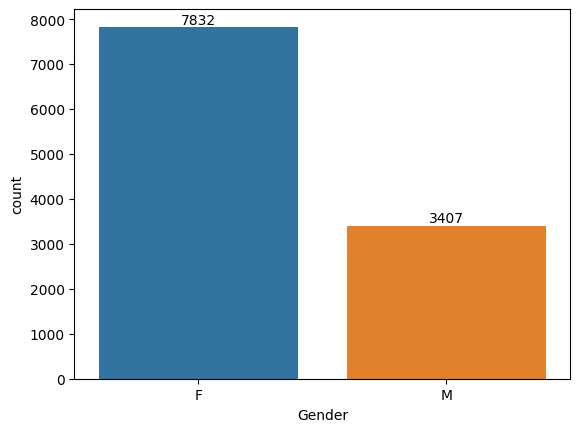

In [17]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender', data= df, palette =['#1f77b4','#ff7f0e'])

for bars in ax.containers:
  ax.bar_label(bars)

plt.show()

<ipython-input-20-133586aca1d0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, palette =['#800000', '#FFFF00'])


<Axes: xlabel='Gender', ylabel='Amount'>

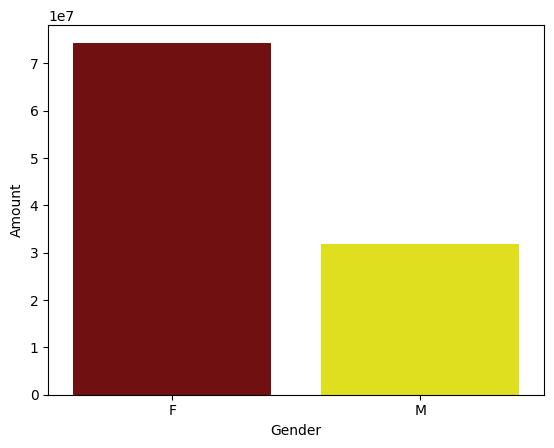

In [20]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, palette =['#800000', '#FFFF00'])

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men.

##Age

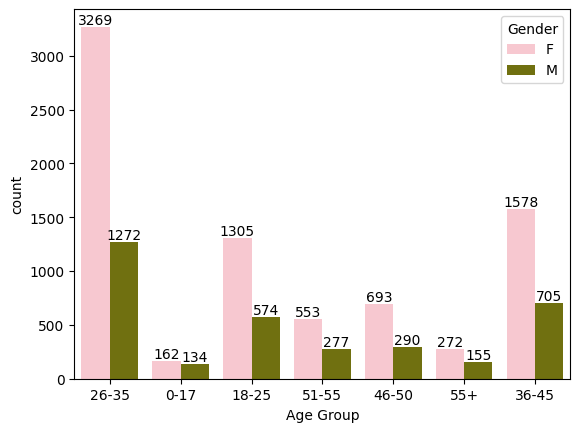

In [26]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender', palette = ['#FFC0CB', '#808000'])

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

<ipython-input-27-38db02b06965>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, palette = ['#FF6347','#4682B4'])
<ipython-input-27-38db02b06965>:4: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, palette = ['#FF6347','#4682B4'])


<Axes: xlabel='Age Group', ylabel='Amount'>

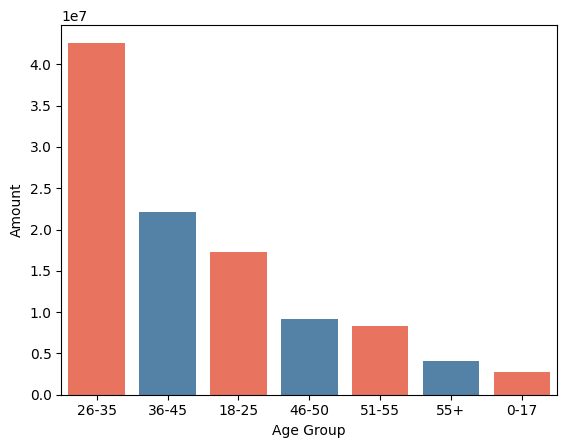

In [27]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, palette = ['#FF6347','#4682B4'])

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

---



---



<ipython-input-33-6d842fe895be>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=sales_state, x= 'State',y='Orders', palette = colors)


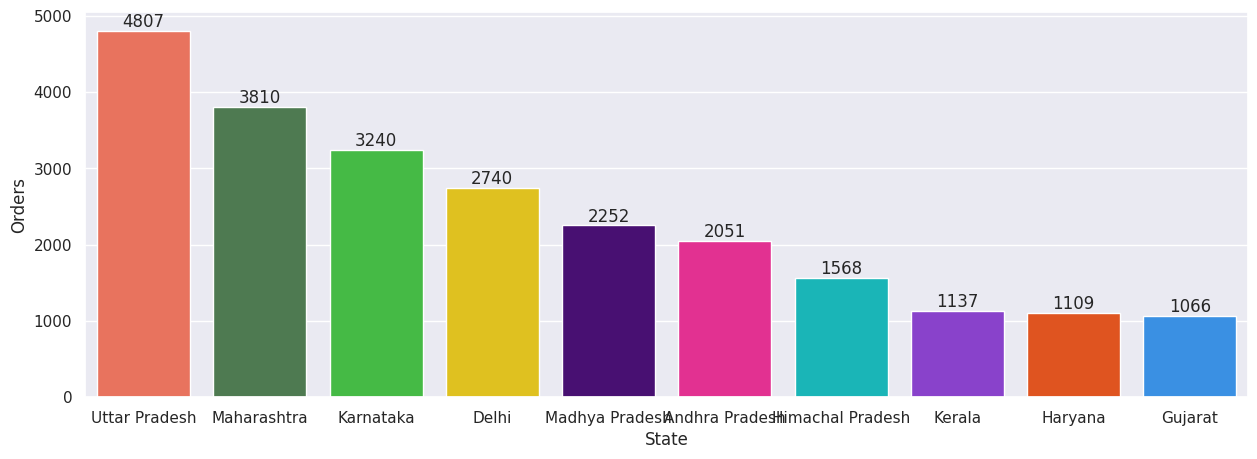

In [33]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

colors = ['#FF6347','#46824B','#32CD32','#FFD700','#4B0082','#FF1493','#00CED1','#8A2BE2','#FF4500','#1E90FF']

plt.figure(figsize=(15,5))
ax=sns.barplot(data=sales_state, x= 'State',y='Orders', palette = colors)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

<ipython-input-34-586637404e22>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=sales_state, x= 'State',y='Amount', palette = colors)


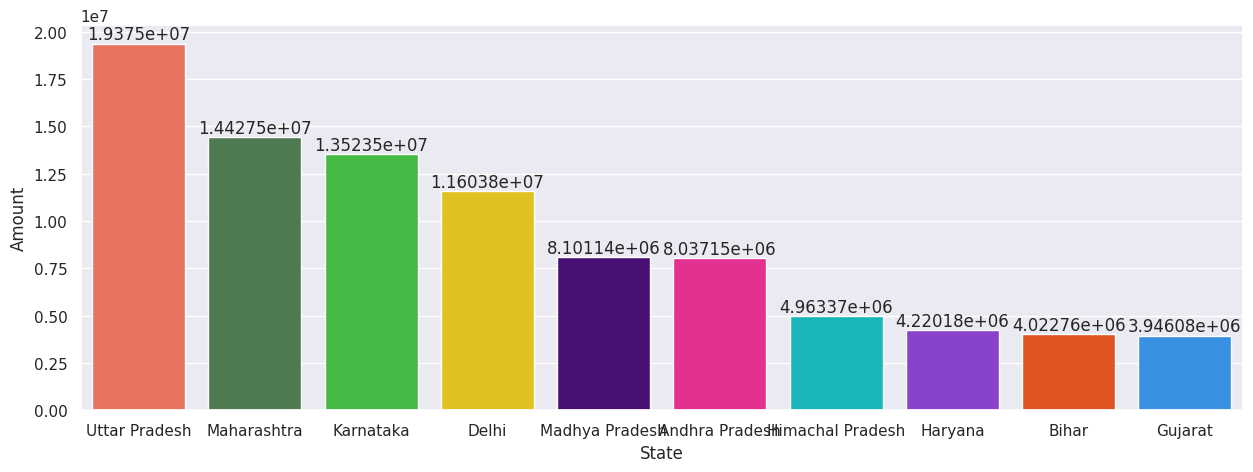

In [34]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

colors = ['#FF6347','#46824B','#32CD32','#FFD700','#4B0082','#FF1493','#00CED1','#8A2BE2','#FF4500','#1E90FF']

plt.figure(figsize=(15,5))
ax=sns.barplot(data=sales_state, x= 'State',y='Amount', palette = colors)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

##Marital Status

<ipython-input-36-d34f6eea7d11>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Marital_Status', palette =['#FF00FF','#FF0000'])


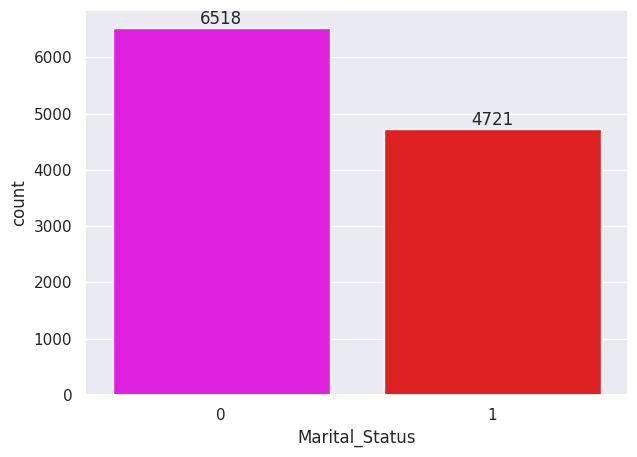

In [36]:
ax = sns.countplot(data = df, x = 'Marital_Status', palette =['#FF00FF','#FF0000'])

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Marital_Status', ylabel='Amount'>

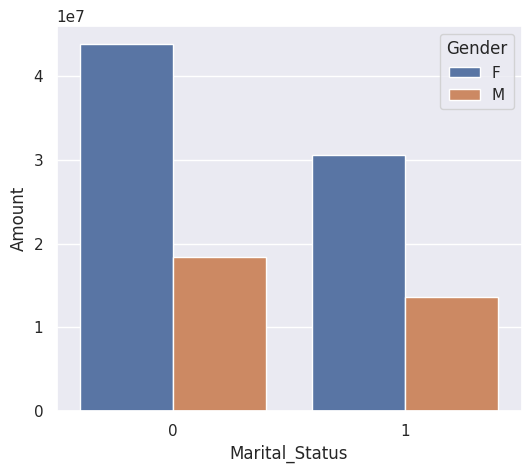

In [37]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

##Occupation

<ipython-input-40-6c738d4857d9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Occupation', palette = colors)


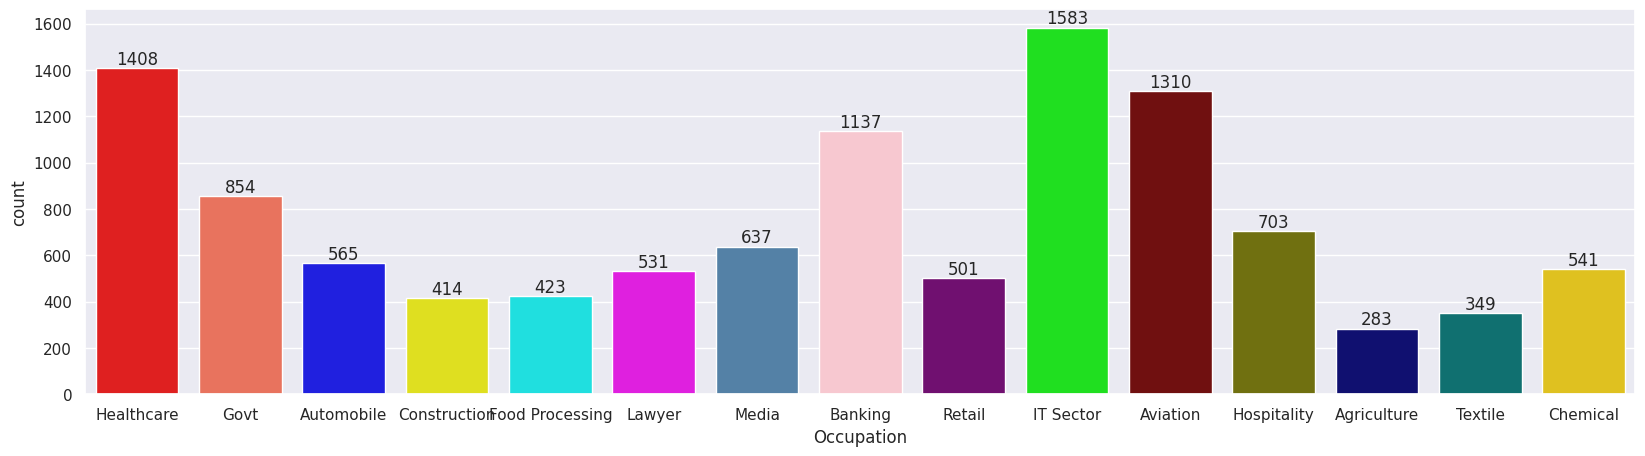

In [40]:
sns.set(rc={'figure.figsize':(20,5)})

colors = ['#FF0000','#FF6347','#0000FF','#FFFF00','#00FFFF','#FF00FF','#4682B4','#FFC0CB','#800080','#00FF00','#800000','#808000','#000080','#008080','#FFD700']
ax = sns.countplot(data = df, x = 'Occupation', palette = colors)

for bars in ax.containers:
    ax.bar_label(bars)

<ipython-input-42-bfab35163703>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount', palette = colors)


<Axes: xlabel='Occupation', ylabel='Amount'>

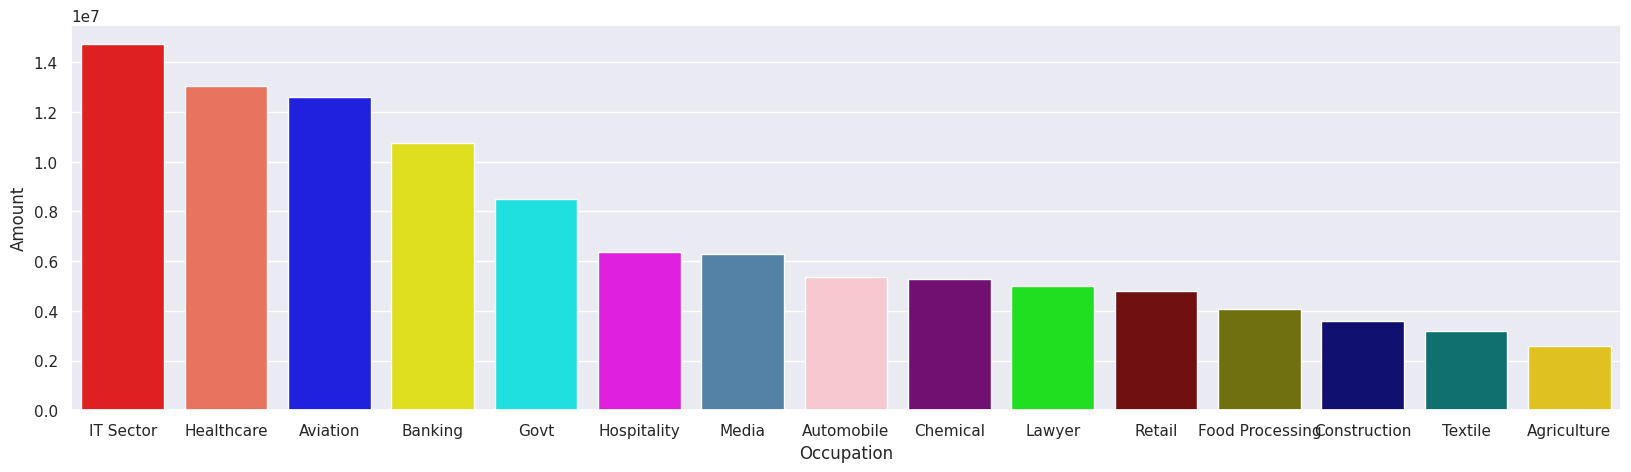

In [42]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

colors = ['#FF0000','#FF6347','#0000FF','#FFFF00','#00FFFF','#FF00FF','#4682B4','#FFC0CB','#800080','#00FF00','#800000','#808000','#000080','#008080','#FFD700']
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount', palette = colors)

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

## Product Category

<ipython-input-45-6add80b79cb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Product_Category', palette = colors)
<ipython-input-45-6add80b79cb8>:3: UserWarning: 
The palette list has fewer values (15) than needed (18) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data = df, x = 'Product_Category', palette = colors)


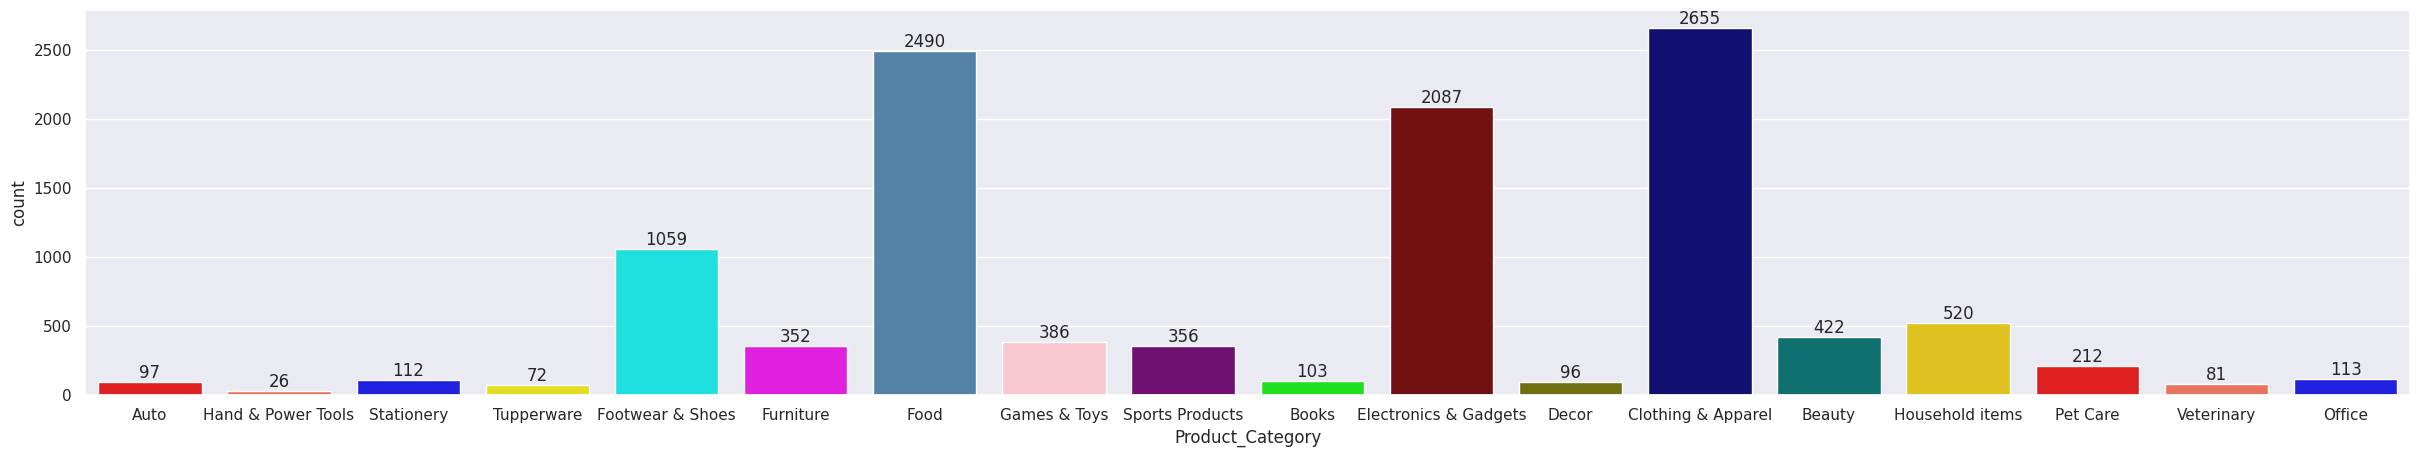

In [45]:
sns.set(rc={'figure.figsize':(30,5)})
colors = ['#FF0000','#FF6347','#0000FF','#FFFF00','#00FFFF','#FF00FF','#4682B4','#FFC0CB','#800080','#00FF00','#800000','#808000','#000080','#008080','#FFD700']
ax = sns.countplot(data = df, x = 'Product_Category', palette = colors)

for bars in ax.containers:
    ax.bar_label(bars)

<ipython-input-46-36da72878da5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount', palette = colors)
<ipython-input-46-36da72878da5>:4: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount', palette = colors)


<Axes: xlabel='Product_Category', ylabel='Amount'>

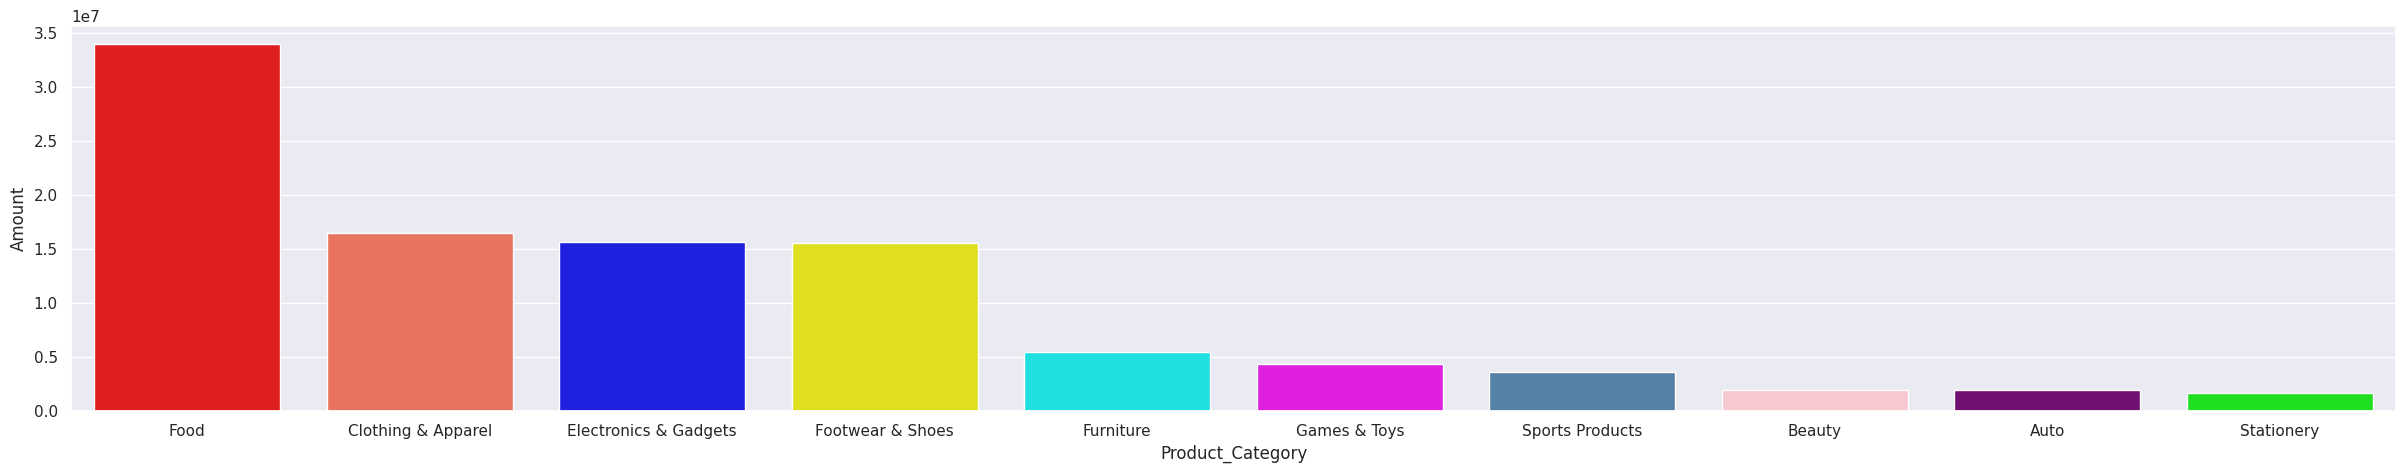

In [46]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
colors = ['#FF0000','#FF6347','#0000FF','#FFFF00','#00FFFF','#FF00FF','#4682B4','#FFC0CB','#800080','#00FF00','#800000','#808000','#000080','#008080','#FFD700']
sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount', palette = colors)

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<ipython-input-47-1055a40c9c5e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', palette = colors)
<ipython-input-47-1055a40c9c5e>:6: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', palette = colors)


<Axes: xlabel='Product_ID', ylabel='Orders'>

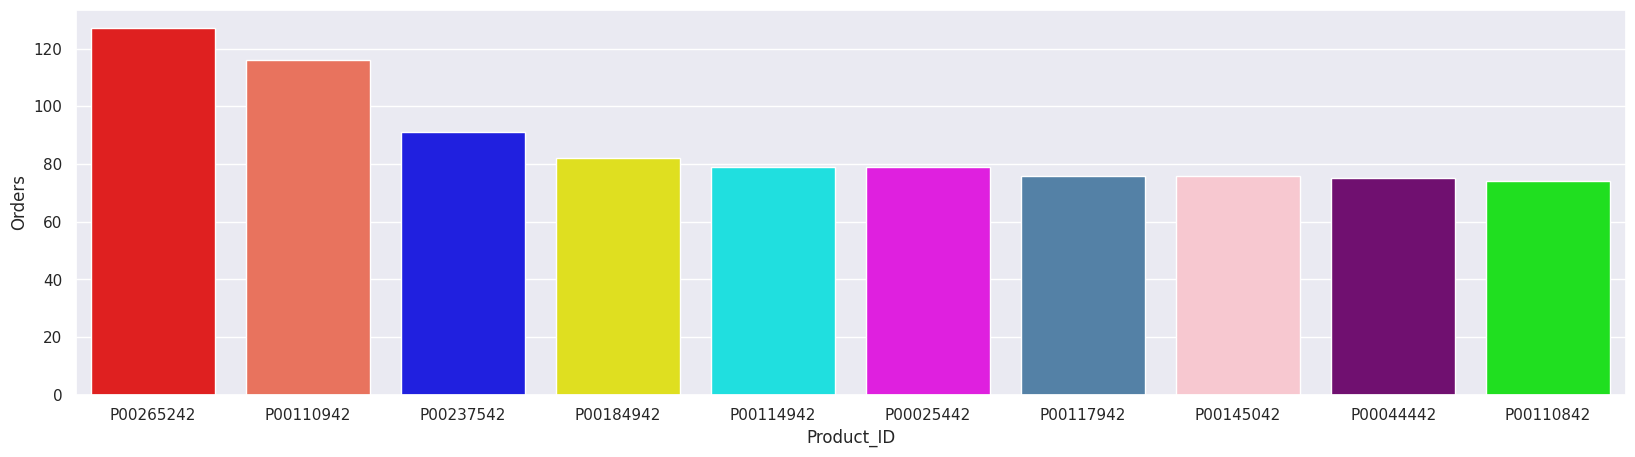

In [47]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

colors = ['#FF0000','#FF6347','#0000FF','#FFFF00','#00FFFF','#FF00FF','#4682B4','#FFC0CB','#800080','#00FF00','#800000','#808000','#000080','#008080','#FFD700']

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', palette = colors)

<Axes: xlabel='Product_ID'>

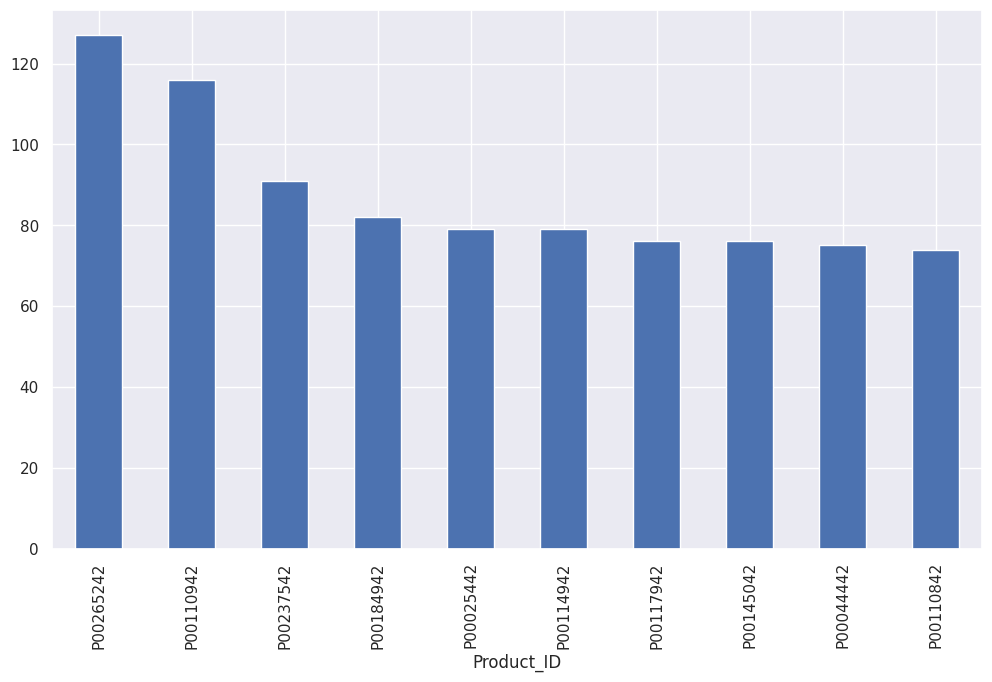

In [48]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

##Conclusion:
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category